In [68]:
# -*- coding: utf-8 -*-
"""
Script to generate a 3-d plot of the kernel density estimate for a set of 2-d  
points imported from a file.
"""
import pickle, matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
dim=2


def measure(t):
    '''
    Samples from the real probability distribution, whose parameters are to be
    inferred.
    
    Parameters
    ----------
    t: float
        The measurement time, an experimental control.
        
    Returns
    -------
    1 or 0 depending on the result.
    '''
    r = random.random()
    # A sum of squared cosines. 
    p = np.random.binomial(1, p=np.sum(np.cos(real_parameters*t/2)**2/dim))
    if (r<p):
        return 1
    return 0

def simulate_1(particle, t):
    '''
    Provides an estimate for the likelihood  P(D=1|v,t) of outcome 1 given 
    a vector of parameters v and a time of choice t. 
    
    Parameters
    ----------
    particle: [float]
        The set of parameters to be used in the simulation.
    t: float
        The measurement time, an experimental control.
        
    Returns
    -------
    p: float
        The estimated probability of getting result 1.
    '''
    p=np.sum(np.cos(particle*t/2)**2/dim)
    return p 

def likelihood(data,particle):
    '''
    Provides an estimate for the likelihood  P(data|v,t) given a data record
    and a vector of parameters v (the particle).
    
    Parameters
    ----------
    data: [([float],int)]
        A vector of experimental results obtained so far and their respective 
        controls, each datum being of the form (time,outcome), where 'time' is          
        the control used for each experiment and 'outcome' is its result.
    particle: [float]
        The set of parameters to be used for the likelihood.
        
    Returns
    -------
    p: float
        The estimated probability of obtaining the input outcome. 
    '''
    
    p = np.product([simulate_1(particle,t) if (outcome==1)
                        else 1-simulate_1(particle,t) for (t,outcome) in data])
    return p 

X,Y,zz,levels,xs,ys,zs,weights = None,None,None,None,None,None,None,None

def plot_3d_I(data,particles):
    global X,Y,zz,levels,xs,ys,zs,weights

    xx = np.linspace(0, 1, 1000)
    yy = np.linspace(0, 1, 1000)
    zz = np.zeros((xx.size,yy.size))

    for i1,y in enumerate(yy):
        for i2,x in enumerate(xx):
             # Reverse order because of x-y vs row-column ordering for mesh.
             # Do [i1,i2] or use transpose.
            zz[i2,i1] = likelihood(data,np.array([x,y]))
        print(i1,end=";")
        
    X, Y = np.meshgrid(xx, yy)

    params = [p[0] for p in particles]
    weights = [p[1] for p in particles]

    xs = [p[0] for p in params]
    ys = [p[1] for p in params]

    # Height should be just above density plot to make visualization clear.
    zs = [likelihood(data,particle) for particle in params]
    
def dict_to_list(distribution):
    particles = []
    for key in distribution:
        particle = np.frombuffer(key,dtype='float64')
        weight = distribution[key]
        particles.append((particle,weight))
    return particles

def main():
    with open('2ddatavec.data', 'rb') as filehandle:
        data = pickle.load(filehandle)
    with open('2dparticles.data', 'rb') as filehandle:
        particles = dict_to_list(pickle.load(filehandle))

    plot_3d_I(data,particles)
main()

0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;47;48;49;50;51;52;53;54;55;56;57;58;59;60;61;62;63;64;65;66;67;68;69;70;71;72;73;74;75;76;77;78;79;80;81;82;83;84;85;86;87;88;89;90;91;92;93;94;95;96;97;98;99;100;101;102;103;104;105;106;107;108;109;110;111;112;113;114;115;116;117;118;119;120;121;122;123;124;125;126;127;128;129;130;131;132;133;134;135;136;137;138;139;140;141;142;143;144;145;146;147;148;149;150;151;152;153;154;155;156;157;158;159;160;161;162;163;164;165;166;167;168;169;170;171;172;173;174;175;176;177;178;179;180;181;182;183;184;185;186;187;188;189;190;191;192;193;194;195;196;197;198;199;200;201;202;203;204;205;206;207;208;209;210;211;212;213;214;215;216;217;218;219;220;221;222;223;224;225;226;227;228;229;230;231;232;233;234;235;236;237;238;239;240;241;242;243;244;245;246;247;248;249;250;251;252;253;254;255;256;257;258;259;260;261;262;263;264;265;266;267;268;269;270;271;272;273;274;275;276;27

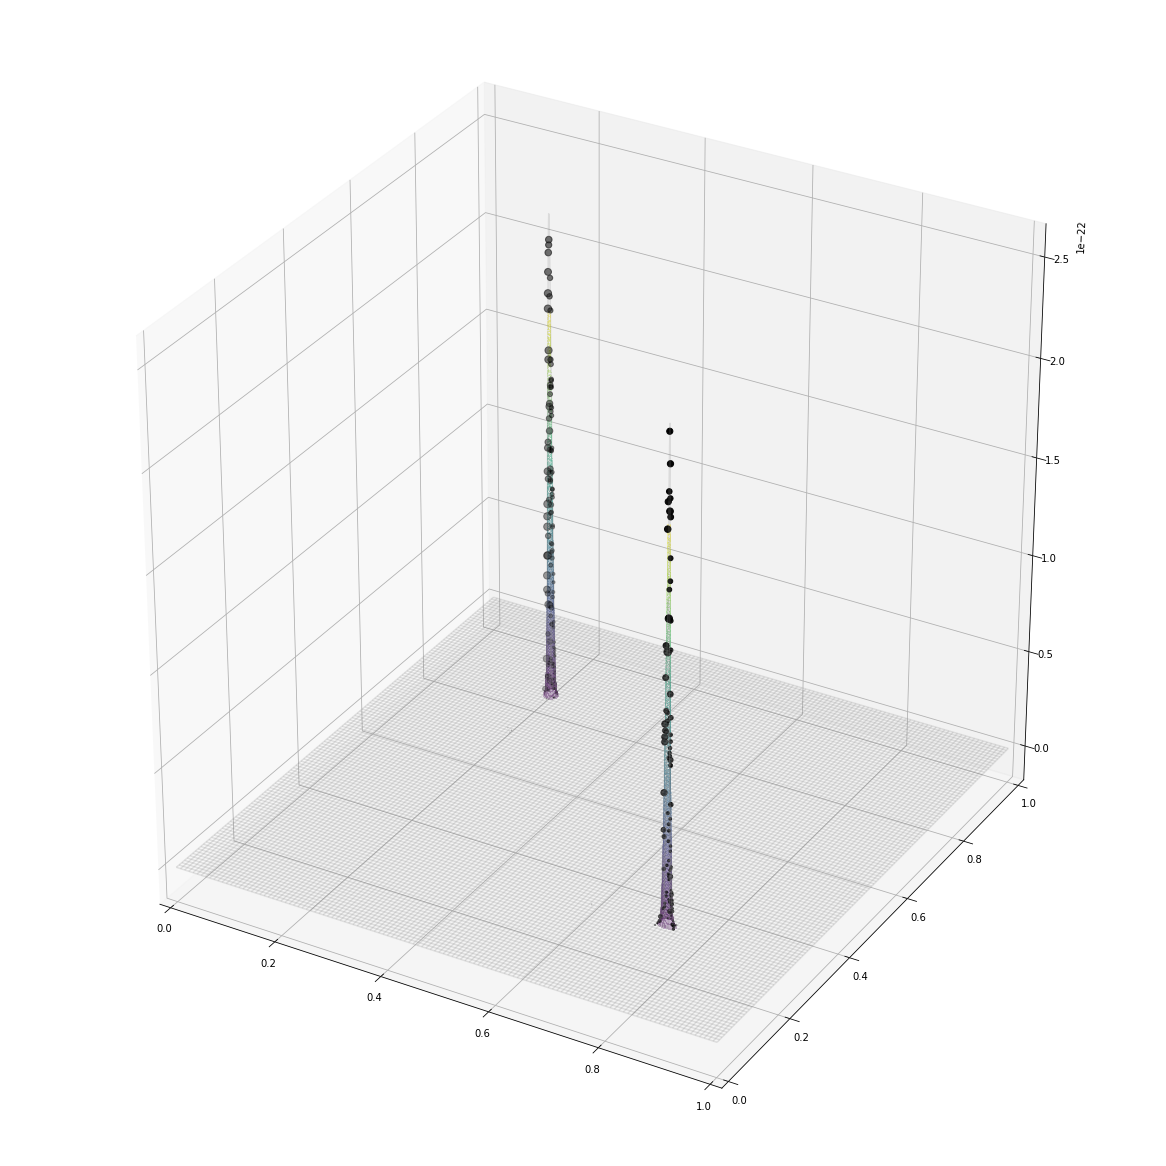

In [98]:
def plot_3d_II():
    fig = plt.figure(figsize=(16,16))
    ax = Axes3D(fig)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    ax.plot_wireframe(X, Y, zz.T,rstride=8,cstride=8, color='gray',alpha=0.2)
    
    zmin = 10**-25
    zmax = 2*10**-22
    levels = np.linspace(zmin, zmax, 500)
    #ax.plot_surface(X, Y, zz.T, linewidth=0, alpha=0.5)
    ax.contourf(X, Y, zz.T,
                zdir='z', levels=levels, alpha=0.3)
    scale=4000
    ax.scatter(xs, ys,zs, c='black',s=[w*scale for w in weights])
    plt.show()

plot_3d_II()